In [1]:
# in this project, you will learn how to
# - fit models to data
# - define your own data models
# - create ellipses in plots

# Woww, it's seem interesting to me 



In [3]:
! pip install lmfit

     -------------------------------------- 103.0/103.0 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 98.4/98.4 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 840.9/840.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492069 sha256=357eb9b41c08e1fa44062ea7f1912955155f51c7d121e7909d2674545a8262b6
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\0c\ff\54\efb16da5b1058114a457b3c7167904915d2e5764b637ae8d3d
Successfully built future



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import lmfit.models as models
from lmfit import Model

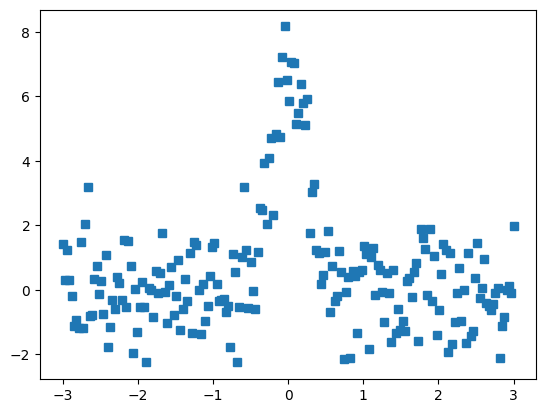

In [11]:
# create a Gaussian model
gaussmodel = models.gaussian

# create 4 parameters for this above model
x = np.linspace(-3,3,200)
a = 4
c = 0
s = .25

# f

f = gaussmodel(x,a,c,s) + np.random.randn(len(x))
plt.plot(x,f, 's')
plt.show()


In [24]:
gaussfit = Model(gaussmodel)
result = gaussfit.fit(f, x = x) # pay attention for x = x parameters,

r = np.corrcoef(f, result.best_fit)[0,1]**2

# result

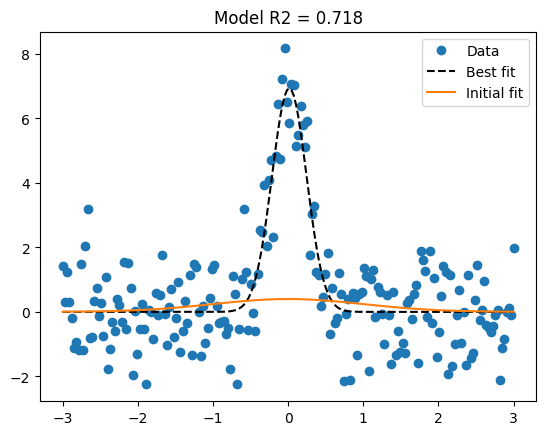

In [25]:
# visualize 
plt.plot(x, f, 'o', label = 'Data')
plt.plot(x, result.best_fit, 'k--', label = 'Best fit')
plt.plot(x, result.init_fit, '-', label = 'Initial fit')
plt.title('Model R2 = %.3f'%r)
plt.legend()
plt.show()


In [3]:
# The next is the Model an exponential decay

# create the parameters

x = np.linspace(1, 10, 300)


In [24]:
noise = [np.random.normal(0,np.sqrt(0.01)) for _ in range(len(x))] 
y = 1/x**2 + noise

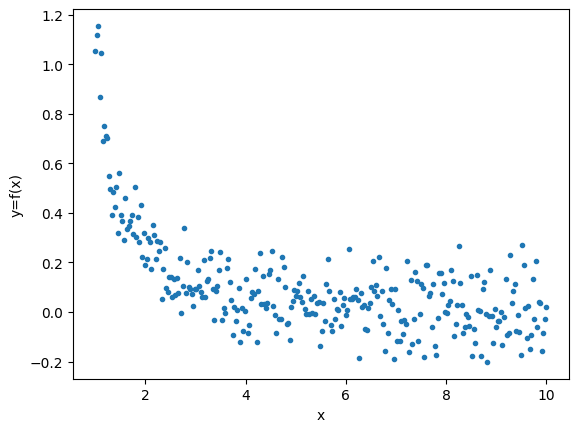

In [25]:
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

In [29]:
# create the exonential model

ex_fit = Model(models.exponential)

result2 = gaussfit.fit(y, x = x)
result2

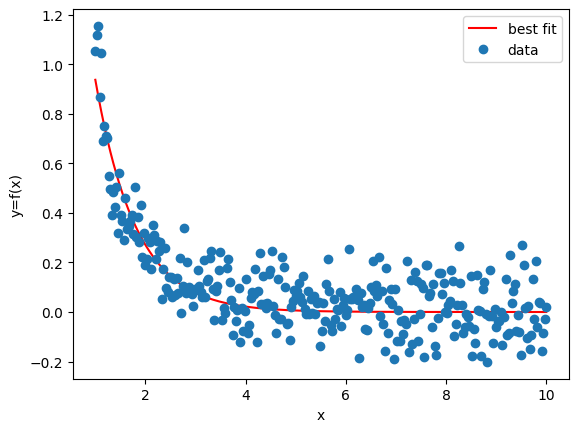

In [30]:
plt.plot(x, result.best_fit, 'r', label = 'best fit')
plt.plot(x, y, 'o', label = 'data')
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.legend()
plt.show()

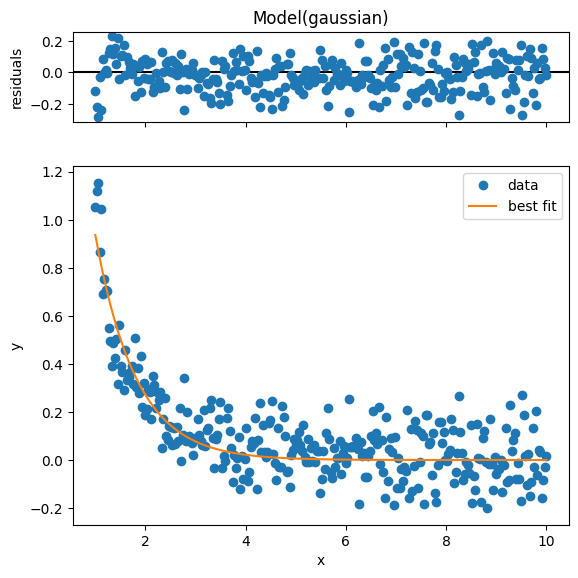

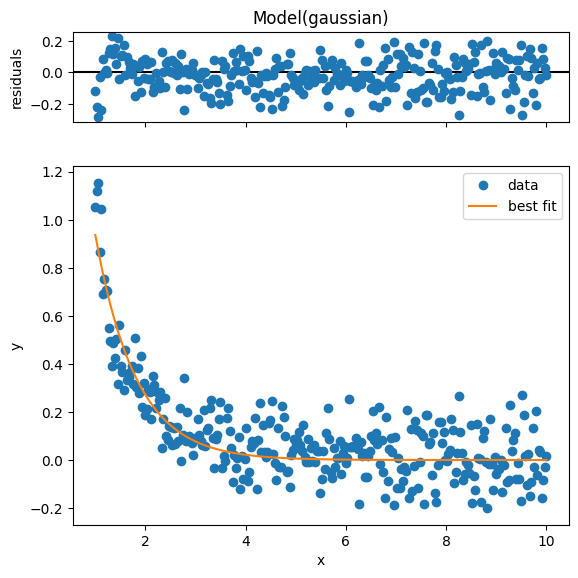

In [31]:
# or you can dirrectly plot from the result

result2.plot()

In [4]:
# use a user-defined function (sigmoid)
import math

In [8]:
x = np.linspace(-2,2,300)
x

array([-2.        , -1.98662207, -1.97324415, -1.95986622, -1.94648829,
       -1.93311037, -1.91973244, -1.90635452, -1.89297659, -1.87959866,
       -1.86622074, -1.85284281, -1.83946488, -1.82608696, -1.81270903,
       -1.7993311 , -1.78595318, -1.77257525, -1.75919732, -1.7458194 ,
       -1.73244147, -1.71906355, -1.70568562, -1.69230769, -1.67892977,
       -1.66555184, -1.65217391, -1.63879599, -1.62541806, -1.61204013,
       -1.59866221, -1.58528428, -1.57190635, -1.55852843, -1.5451505 ,
       -1.53177258, -1.51839465, -1.50501672, -1.4916388 , -1.47826087,
       -1.46488294, -1.45150502, -1.43812709, -1.42474916, -1.41137124,
       -1.39799331, -1.38461538, -1.37123746, -1.35785953, -1.34448161,
       -1.33110368, -1.31772575, -1.30434783, -1.2909699 , -1.27759197,
       -1.26421405, -1.25083612, -1.23745819, -1.22408027, -1.21070234,
       -1.19732441, -1.18394649, -1.17056856, -1.15719064, -1.14381271,
       -1.13043478, -1.11705686, -1.10367893, -1.090301  , -1.07

In [54]:
# create the function 

alpha = 2
beta = 3.46
tau = 0

y = alpha/(1 + np.exp(-beta*(x - tau))) + 0.1*np.random.randn(len(x))




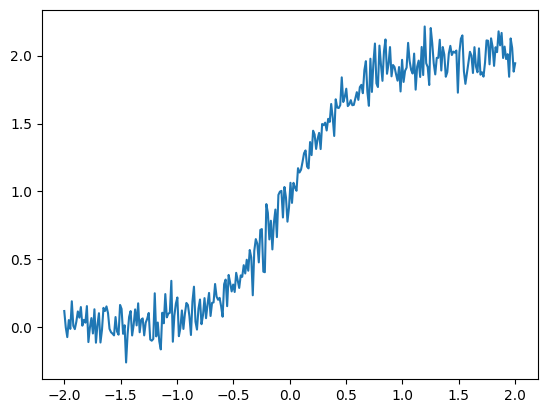

In [55]:

plt.plot(x, y)
plt.show()

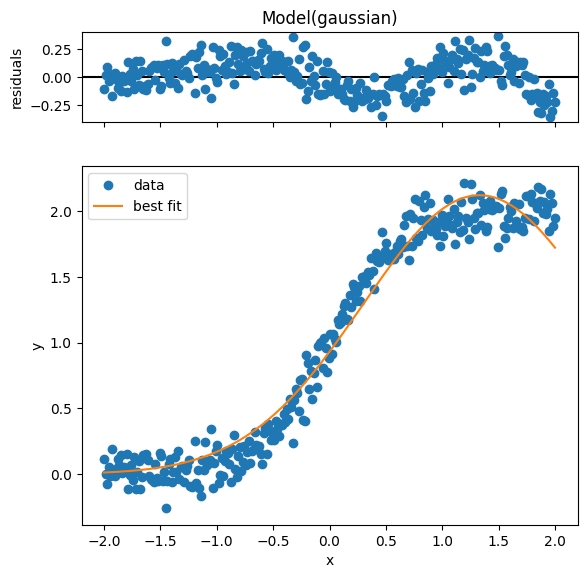

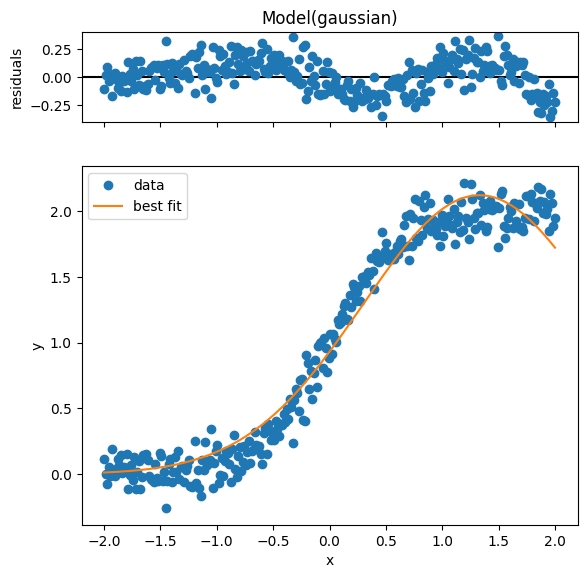

In [56]:
model1 = Model(models.gaussian)
res1 = model1.fit(y,x = x)
res1.plot()

In [57]:
coerr = np.corrcoef(y, res1.best_fit)[1,0]**2
coerr

0.9697991319727313

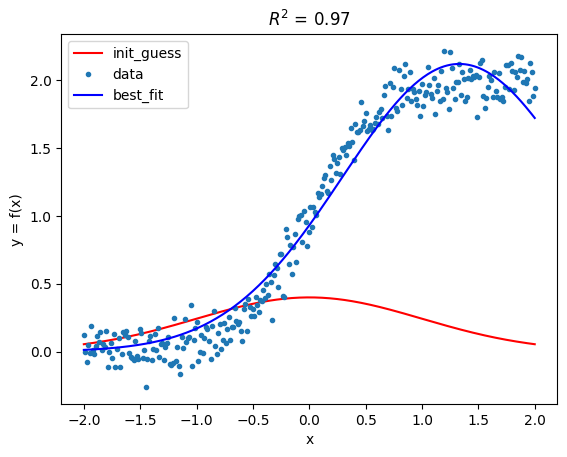

In [58]:
# plot intial guess and best fit

plt.plot(x,res1.init_fit,  'r', label = 'init_guess')
plt.plot(x, y, '.', label = 'data')
plt.plot(x, res1.best_fit, 'blue', label = 'best_fit')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('$R^2$ = {}'.format(round(coerr,2)))

plt.legend()
plt.show()

In [72]:
# or you can create your own function 

def sigmoid(x, alpha =1, beta=1 , tau=0 ): # you have to set defeaut values to the parameters
    return alpha/(1 + np.exp(-beta*(x - tau))) 

y = sigmoid(x, 2, 3.46, 0) + 0.1*np.random.randn(len(x))

model_sigmoid = Model(sigmoid)

sigresult = model_sigmoid.fit(y, x = x)
sigresult

In [ ]:
# so, from this examples, you now have tools to fit a numbers of data in to a function. 